In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset=pd.read_csv("911.csv")

In [3]:
dataset.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
dataset.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [6]:
dataset.nunique()

lat          14579
lng          14586
desc         99455
zip            104
title          110
timeStamp    72577
twp             68
addr         21914
e                1
dtype: int64

In [7]:
X=dataset.iloc[:,[3,6,7]]
X

,zip,twp,addr
0,19525.0,NEW HANOVER,REINDEER CT & DEAD END
1,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,19401.0,NORRISTOWN,HAWS AVE
3,19401.0,NORRISTOWN,AIRY ST & SWEDE ST
4,NaN,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END
...,...,...,...
99487,19401.0,NORRISTOWN,MARKLEY ST & W LOGAN ST
99488,19003.0,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL
99489,19401.0,NORRISTOWN,CHESTNUT ST & WALNUT ST
99490,19002.0,HORSHAM,WELSH RD & WEBSTER LN


In [8]:
from sklearn.impute import SimpleImputer
sim=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
sim.fit(X)
Y=sim.transform(X)

In [9]:
dataset.iloc[:,[3,6,7]]=Y

In [10]:
dataset.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

In [11]:
dataset["zip"].value_counts()

19401.0    19834
19464.0     6643
19403.0     4854
19446.0     4748
19406.0     3174
           ...  
77316.0        1
19457.0        1
19139.0        1
19119.0        1
17752.0        1
Name: zip, Length: 104, dtype: int64

In [12]:
dataset[dataset.zip==19401]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,19401.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,19401.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1
...,...,...,...,...,...,...,...,...,...
99480,40.221227,-75.288737,SUMNEYTOWN PIKE & RR OVERPASS; UPPER GWYNEDD;...,19401.0,EMS: DIABETIC EMERGENCY,2016-08-24 10:52:01,UPPER GWYNEDD,SUMNEYTOWN PIKE & RR OVERPASS,1
99481,40.221227,-75.288737,SUMNEYTOWN PIKE & RR OVERPASS; UPPER GWYNEDD;...,19401.0,EMS: DIZZINESS,2016-08-24 10:52:01,UPPER GWYNEDD,SUMNEYTOWN PIKE & RR OVERPASS,1
99482,40.340072,-75.591709,RT100 SB & E PHILADELPHIA AVE OVERPASS; DOUGLA...,19401.0,Traffic: DISABLED VEHICLE -,2016-08-24 10:52:03,DOUGLASS,RT100 SB & E PHILADELPHIA AVE OVERPASS,1
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1


In [13]:
X1=dataset[dataset.zip==19401]["title"].value_counts()

In [14]:
X1

Traffic: VEHICLE ACCIDENT -           4748
Traffic: DISABLED VEHICLE -           2165
EMS: VEHICLE ACCIDENT                 1723
EMS: RESPIRATORY EMERGENCY             864
EMS: CARDIAC EMERGENCY                 757
                                      ... 
Fire: CARDIAC ARREST                     1
Fire: UNKNOWN MEDICAL EMERGENCY          1
Fire: HAZARDOUS MATERIALS INCIDENT       1
EMS: RESCUE - ELEVATOR                   1
EMS: BOMB DEVICE FOUND                   1
Name: title, Length: 94, dtype: int64

In [15]:
dataset.addr.value_counts()

SHANNONDELL DR & SHANNONDELL BLVD    1457
MAIN ST & OLD SUMNEYTOWN PIKE         390
THE FAIRWAY  & RYDAL RD               260
GULPH RD & KIRK AVE                   235
EVERGREEN RD & W LIGHTCAP RD          232
                                     ... 
FAIRFIELD RD & HAWS ALY                 1
MANOR RD & PENN VALLEY RD               1
OAK ST & RAILROAD AVE                   1
ANDERSON RD & DARTMOUTH DR              1
SWAMP                                   1
Name: addr, Length: 21914, dtype: int64

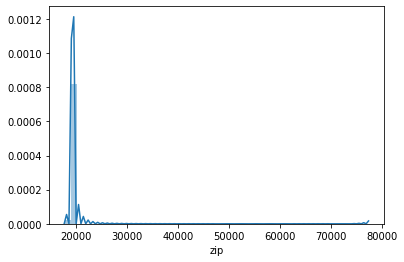

In [16]:
sns.distplot(dataset["zip"])

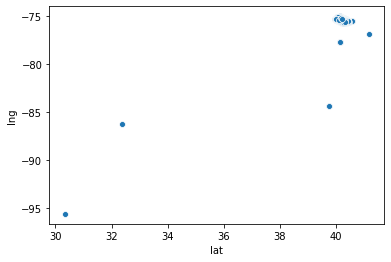

In [17]:
sns.scatterplot(x=dataset["lat"],y=dataset["lng"])

In [18]:
dataset[["lat","lng"]][dataset.zip==19401][:25]

,lat,lng
2,40.121182,-75.351975
3,40.116153,-75.343513
4,40.251492,-75.603350
10,40.231990,-75.251891
14,40.097222,-75.376195
18,40.114239,-75.338508
20,40.114239,-75.338508
23,40.143326,-75.422819
24,40.153268,-75.189558
28,40.097222,-75.376195


In [19]:
dataset[["lat","lng"]][dataset.zip==17752.0][:]

,lat,lng
8367,41.167156,-76.87403


In [20]:
dataset["lat"].value_counts()

40.097222    1491
40.229008    1006
40.133037     938
40.024967     905
40.172314     521
             ... 
40.278672       1
40.082621       1
40.152015       1
40.262186       1
40.265839       1
Name: lat, Length: 14579, dtype: int64

In [21]:
dataset["lng"].value_counts()

-75.376195    1491
-75.282905    1031
-75.387853    1006
-75.408463     938
-75.236238     711
              ... 
-75.186145       1
-75.352841       1
-75.135546       1
-75.326311       1
-75.331166       1
Name: lng, Length: 14586, dtype: int64

In [22]:
dataset.addr.value_counts().idxmax()

'SHANNONDELL DR & SHANNONDELL BLVD'

In [23]:
dataset.addr.value_counts().idxmin()

'GREENWOOD AVE & RICES MILL RD'

In [26]:
dataset["region"]=dataset.title.apply(lambda e: e.split(":")[0] )

In [27]:
dataset["region"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: region, dtype: int64

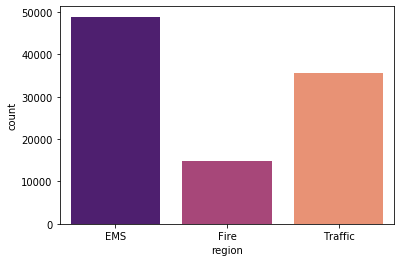

In [39]:
sns.countplot(x='region',data=dataset,palette="magma")

In [41]:
dataset.timeStamp.iloc[0]

'2015-12-10 17:40:00'

In [42]:
type(dataset.timeStamp.iloc[0])

str

Time series Analysis
1.Stock Market
2.weather forecasting


Pandas Time seires data structure :
     TimeStamp "2020-01-01"
     TimeDuration "10 hpurs"
     Fixed Interval Frequency "2business day"

In [45]:
pd.to_datetime("2020-01-01")

Timestamp('2020-01-01 00:00:00')

In [46]:
df=pd.DataFrame({'year':[2015,2016],
                 'month':[2,3],
                  'day':[4,5]})

In [47]:
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [48]:
df=pd.to_datetime(df)

In [49]:
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [50]:
type(df)

pandas.core.series.Series

In [51]:
dataset['timeStamp']=pd.to_datetime(dataset["timeStamp"])

In [52]:
type(dataset['timeStamp'])

pandas.core.series.Series

In [53]:
dataset['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [54]:
time=dataset["timeStamp"].iloc[0]

In [55]:
time

Timestamp('2015-12-10 17:40:00')

In [57]:
time.hour

17

In [58]:
time.day

10

In [59]:
time.month

12

In [60]:
time.dayofweek

3

In [61]:
time.month_name

<bound method Timestamp.month_name of Timestamp('2015-12-10 17:40:00')>

In [62]:
time.second

0

In [63]:
time.minute

40

In [105]:
 dataset["hour"]=dataset["timeStamp"].apply(lambda time: time.hour )
 dataset["Month"]=dataset["timeStamp"].apply(lambda time: time.month)
 dataset["Day of Week"]=dataset["timeStamp"].apply(lambda time : time.dayofweek )


In [106]:
dataset.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,region,hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,2015-12-10


In [76]:
day={0:'Mon',1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}

In [77]:
dataset["Day of Week"]=dataset["Day of Week"].map(day)

In [103]:
dataset.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,region,hour,Month,Day of Week,Date
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,12,2,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,12,2,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,12,2,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,12,2,2016-08-24
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,Traffic,11,12,2,2016-08-24


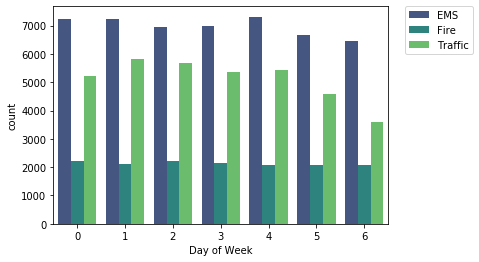

In [115]:
sns.countplot(x="Day of Week",data=dataset,hue='region',palette="viridis")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

In [108]:
bymonth=dataset.groupby('Month').count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,region,hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969


In [80]:
dataset["Date"]=dataset["timeStamp"].apply(lambda e: e.date())

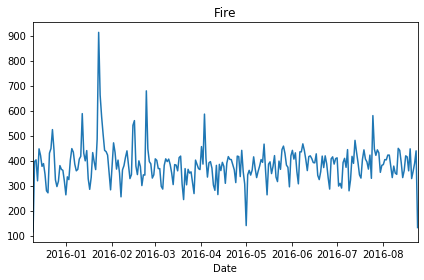

In [83]:
dataset.groupby("Date").count()["twp"].plot()

plt.tight_layout()

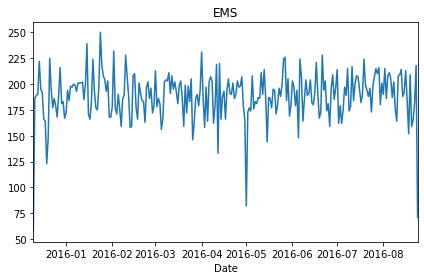

In [87]:
dataset[dataset['region']=='EMS'].groupby('Date').count()["twp"].plot()
plt.title("EMS")
plt.tight_layout()

In [90]:
dayhour=dataset.groupby(by=['Day of Week',"hour"]).count()['region']

In [91]:
dayhour

Day of Week  hour
Friday       0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wednesday    19      686
             20      668
             21      575
             22      490
             23      335
Name: region, Length: 168, dtype: int64

In [92]:
dayhour=dataset.groupby(by=['Day of Week',"hour"]).count()['region'].unstack()
dayhour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


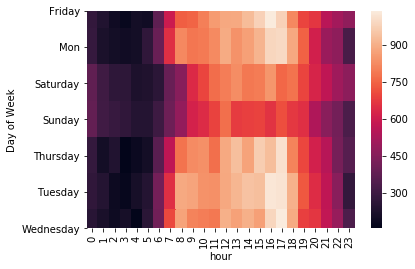

In [93]:
sns.heatmap(dayhour)

In [113]:
daymonth=dataset.groupby(by=['Day of Week',"Month"]).count()['region'].unstack()
daymonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
0,1727,1964,1535,1598,1779,1617,1692,1511,1257
1,1973,1753,1884,1430,1918,1676,1670,1612,1234
2,1700,1903,1889,1517,1538,2058,1717,1295,1262
3,1584,1596,1900,1601,1590,2065,1646,1230,1266
4,1970,1581,1525,1958,1730,1649,2045,1310,1065
5,2291,1441,1266,1734,1444,1388,1695,1099,978
6,1960,1229,1102,1488,1424,1333,1672,1021,907


In [110]:
daymonth=dataset.groupby(by=['Day of Week',"Month"]).count()['region']

In [111]:
daymonth

Day of Week  Month
0            1        1727
             2        1964
             3        1535
             4        1598
             5        1779
                      ... 
6            5        1424
             6        1333
             7        1672
             8        1021
             12        907
Name: region, Length: 63, dtype: int64

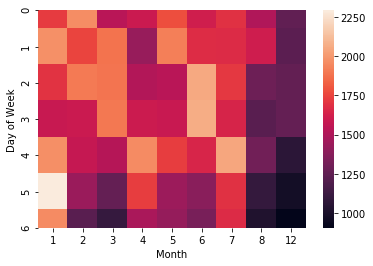

In [114]:
sns.heatmap(daymonth)